# Dataset Balancing

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

In [4]:
SCENARIO_ONE_INSIDE_CSV = "../data/DARPA_2000/Scenario_One/inside/inside_labeled_flows_all.csv"

In [8]:
df = pd.read_csv(SCENARIO_ONE_INSIDE_CSV)
df.head()

,flow_id,start_time,end_time,duration,src_ip,sport,dst_ip,dport,proto,service,orig_bytes,resp_bytes,orig_pkts,resp_pkts,conn_state,local_orig,local_resp,attack_id,attack,phase
0,f0,9.524389e+08,9.524389e+08,0.101800,172.16.112.50,33354,172.16.114.50,80,tcp,http,290,7897,8,9,SF,T,T,0,0,0
1,f1,9.524389e+08,9.524389e+08,0.001107,172.16.114.50,45135,172.16.115.20,53,udp,dns,44,131,1,1,SF,T,T,0,0,0
2,f2,9.524389e+08,9.524389e+08,0.064488,172.16.113.204,22641,172.16.112.100,25,tcp,smtp,623,247,12,22,SF,T,T,0,0,0
3,f3,9.524389e+08,9.524389e+08,0.001167,172.16.112.100,1061,172.16.115.20,53,udp,dns,90,131,2,1,SF,T,T,0,0,0
4,f4,9.524389e+08,9.524389e+08,0.000861,172.16.113.204,1438,172.16.115.20,53,udp,dns,45,131,1,1,SF,T,T,0,0,0


In [ ]:
total_num_attacks = df['attack'].value_counts()[1]
print(f"Total number of attack samples: {total_num_attacks}\n")

num_attack_samples_per_phase = {}
percentage_attack_samples_per_phase = {}
for phase in range(1, 6): # phase 1 to 5
    phase_df = df[df['phase'] == phase]
    counts = phase_df['attack'].value_counts()[1]
    percentage = (counts / total_num_attacks) * 100

    num_attack_samples_per_phase[phase] = counts
    percentage_attack_samples_per_phase[phase] = percentage

    print(f"--- Phase {phase} ---")
    print(f"Number of attack samples: {counts}")
    print(f"Percentage of total attacks: {percentage:.2f}%\n")


Total number of attack samples: 33853

--- Phase 1 ---
Number of attack samples: 20
Percentage of total attacks: 0.06%

--- Phase 2 ---
Number of attack samples: 22
Percentage of total attacks: 0.06%

--- Phase 3 ---
Number of attack samples: 35
Percentage of total attacks: 0.10%

--- Phase 4 ---
Number of attack samples: 22
Percentage of total attacks: 0.06%

--- Phase 5 ---
Number of attack samples: 33754
Percentage of total attacks: 99.71%



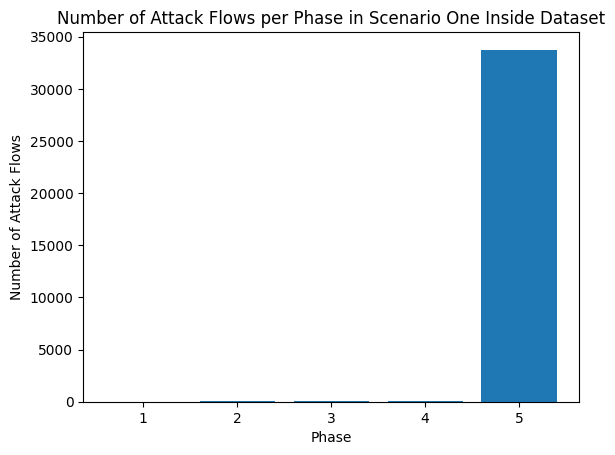

In [ ]:
# Vizualization of class distribution
plt.bar(num_attack_samples_per_phase.keys(), num_attack_samples_per_phase.values())
plt.xlabel('Phase')
plt.ylabel('Number of Attack Flows')
plt.title('Number of Attack Flows per Phase in Scenario One Inside Dataset')
plt.show()